In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

# A company released new SUV car in the market for the cheaper cost. To increase the sales of the newly released SUV car, company advertised in the social network. From the social network users, who saw the advertisement, the company collected the information such as gender, age, approximate salary and purchased or not. This information is available in the form of data set (Social_Network_Ads.csv).  Design a Linear Support Vector classifier to find number of correct and incorrect predictions. Visualize the training and test set results

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
from sklearn.svm import LinearSVC

In [9]:
classifier=LinearSVC()
classifier.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [10]:
y_pred=classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix 

In [12]:
cm=confusion_matrix(y_test,y_pred)

In [13]:
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [14]:
tp=cm[0][0]
tn=cm[1][1]
fn=cm[0][1]
fp=cm[1][0]
acc=(tp+tn)/(tp+tn+fp+fn)
miss=1-acc
spec=tn/(tn+fp)
preval=(tp+fn)/(tp+fp+tn+fn)
precesion=tp/(tp+fp)
fprate=fp/(fp+tn)

In [15]:
print("Accuracy:",acc)
print("Misclassification:",miss)
print("Specificity:",spec)
print("Prevalence:",preval)
print("Precession:",precesion)
print("False Positive rate:",fprate)

Accuracy: 0.9
Misclassification: 0.09999999999999998
Specificity: 0.75
Prevalence: 0.68
Precession: 0.8918918918918919
False Positive rate: 0.25


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


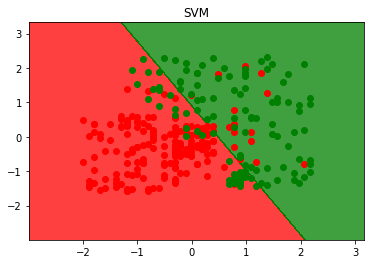

In [16]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,].min()-1,stop=X_set[:,].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(['red','green'])(i),label=j)
plt.title("SVM")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


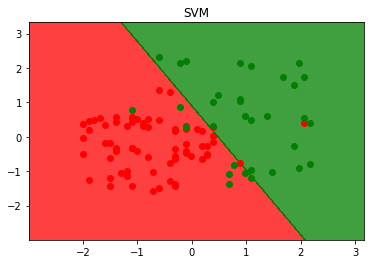

In [17]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,].min()-1,stop=X_set[:,].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(['red','green']))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(['red','green'])(i),label=j)
plt.title("SVM")
plt.show()